# This ipynb file contains:-
1.finding labels from unlabeled data
2.using clustering to compress the image

In [1]:
import scipy.io as sio
mat_contents = sio.loadmat('./ex7data2.mat')
X = mat_contents['X']

In [2]:
import matplotlib.pyplot as plt
import numpy as np

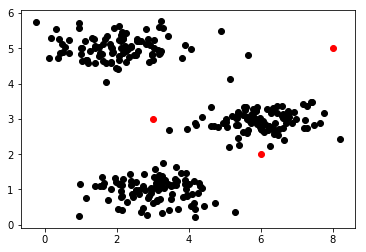

In [3]:
plt.scatter(X[:,0],X[:,1],color='black')
initial_centroids = np.array([[3,3], [6,2],[8,5]])
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],color='r')

# finding closest centroid to data and assising the closest centroid

In [4]:
def closest_Centroid(X,centroids):    
    ind=np.zeros((len(X),1))
    for i in range(len(X)):
        distances=np.zeros((len(centroids),1))
        for j in range(len(centroids)):
               distances[j,:]=np.sqrt(np.sum(np.square(X[i,:]-centroids[j,:])))
        val=np.min(distances)
        ind[i,:]=list(distances).index(val)
    return ind
    

# computing centroid mean


In [5]:
def centroid_mean(ind,X,no_k):   
    ind=ind.astype("int")
    mean=np.zeros((no_k,2))
    for k in range(no_k):
        pos=[]
        for i in range(len(ind)):
            if k==ind[i]:
                pos.append(X[i,:])
        pos=np.array(pos)
        mean[k,:]=np.sum(pos,axis=0)/len(pos)
    return mean

In [6]:
# centroid_result=[]
def compute(centroids,k):    
    for i in range(10):    
        ind=closest_Centroid(X,centroids)
        centroids=centroid_mean(ind,X,k)
#         centroid_result.append(centroids)
    return centroids,ind

In [7]:
mean,ind=compute(initial_centroids,k=3)
mean=np.array(mean)

In [8]:
zero_cluster=np.zeros((98,2))
one_cluster=np.zeros((102,2))
two_cluster=np.zeros((100,2))
for k in range(3):
        pos=[]
        for i in range(len(ind)):
            if k==ind[i]:
                pos.append(X[i,:])
        pos=np.array(pos)
        if k==0:
            zero_cluster=pos
        if k==1:
            one_cluster=pos
        if k==2:
            two_cluster=pos

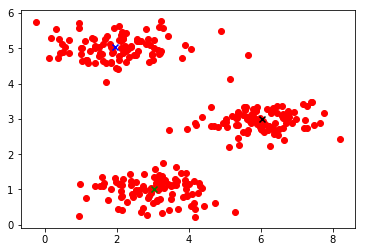

In [9]:
plt.scatter(X[:,0],X[:,1],color='red')
initial_centroids = np.array([[3,3], [6,2],[8,5]])
plt.scatter(mean[0,0],mean[0,1],color='b',marker='x')
plt.scatter(mean[1,0],mean[1,1],color='g',marker='x')
plt.scatter(mean[2,0],mean[2,1],color='black',marker='x')


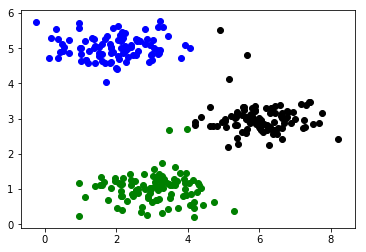

In [10]:
plt.scatter(zero_cluster[:,0],zero_cluster[:,1],color='b',marker='o')
plt.scatter(one_cluster[:,0],one_cluster[:,1],color='g',marker='o')
plt.scatter(two_cluster[:,0],two_cluster[:,1],color='black',marker='o')

# Image Compression using clustering

In [11]:
import scipy.misc
from scipy import ndimage
import numpy as np
path="./ishor.jpg"

In [12]:
image=np.array(ndimage.imread(path,flatten=False))

c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
image=scipy.misc.imresize(image,(75,75)).reshape(75,75,3)
image=image.reshape(75*75,3)
image=image/255

c:\users\ak\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [14]:
def closest_Centroid_image(centroids): 
    idx=np.zeros((len(image),1))
    for i in range(len(image)):
        distances=np.zeros((len(centroids),1))
        for j in range(len(centroids)):
               distances[j,:]=np.sqrt(np.sum(np.square(image[i,:]-centroids[j,:])))
        val=np.min(distances)
        idx[i,:]=list(distances).index(val)
    return idx

# Defining K-means Initial Centroid

In [15]:
def initial_centroid(image_pixel,k):
    np.random.seed(0)
    image_centroid=np.zeros((k,3))
    permpt=list(np.random.permutation(image_pixel.shape[0]))
    image_centroid=image_pixel[permpt[0:k],:]
    return image_centroid

In [16]:
def centroid_mean_image(idx,no_k):   
    mean=np.zeros((no_k,3))
    for k in range(no_k):
        pos=[]
        for i in range(len(idx)):
            if k==idx[i]:
                pos.append(image[i,:])
        pos=np.array(pos)
        mean[k,:]=np.sum(pos,axis=0)/len(pos)
    return mean

In [17]:
value=initial_centroid(image,k=6)

In [18]:
for i in range(10):
    idx=closest_Centroid_image(value)
    idx=idx.astype("int")
    mean_val=centroid_mean_image(idx,no_k=6)
final_image =mean_val[idx,:];
final_image=final_image.reshape((5625,3))
final_image=final_image.reshape((75,75,3))


# Converting original image to 75,75,3 shape

In [19]:
image=image.reshape((75,75,3))
print(image.shape)
print(final_image.shape)

(75, 75, 3)
(75, 75, 3)


Text(0.5,1,'Compressed Image')

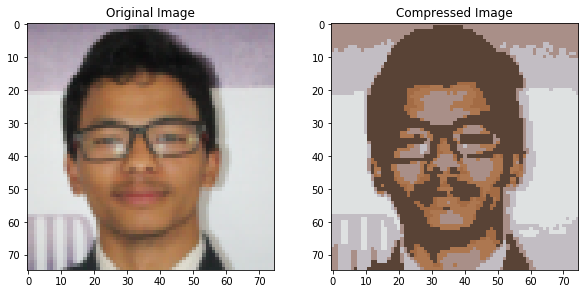

In [20]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax1.imshow(image)
ax1.set_title("Original Image")
ax2.imshow(final_image)
ax2.set_title("Compressed Image")